In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
X,y=make_blobs()
K=3



df=pd.DataFrame({'X':X[:,0],'Y':X[:,1],'Labels':y})
print(df.head())    
print(df.info())
print(df.loc[:,'Labels'].unique())
Kmeans=KMeans(n_clusters=K)
Kmeans.fit_predict(X)
Kmeans.predict(X)
print(Kmeans.labels_)
print(Kmeans.cluster_centers_)

          X         Y  Labels
0 -8.640901 -5.938041       2
1  5.058076  7.083585       0
2  5.015233  4.516223       0
3 -8.385405 -5.543112       2
4  5.716613  5.892936       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   Labels  100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB
None
[2 0 1]
[1 0 0 1 0 0 2 2 2 0 2 2 2 2 0 2 1 1 0 1 1 0 2 2 0 0 2 1 2 1 2 1 1 2 2 2 0
 0 0 0 1 1 1 1 2 0 1 2 0 1 2 2 1 0 0 1 0 1 1 0 1 2 1 0 2 0 0 1 2 1 1 0 2 0
 2 0 1 1 2 2 0 0 2 0 1 1 2 0 1 2 1 1 0 2 0 0 2 1 2 0]
[[ 5.35867255  5.67037253]
 [-8.40107804 -5.95707183]
 [-5.58960896 -2.33598188]]


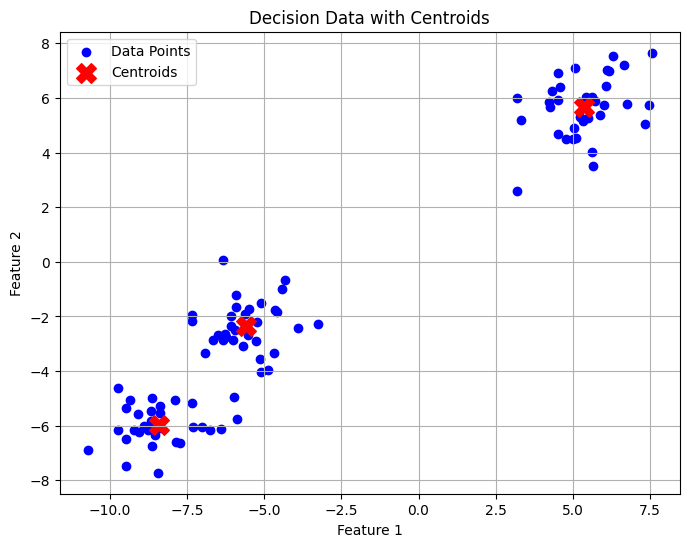

0     2 1 18.18634962185427 0.24057659209620963 4.72...
1     0 0 1.4448277421169267 18.740532494799844 14.2...
2     0 0 1.204164231984518 17.02020270450093 12.625...
3     2 1 17.738148610155424 0.4142562620047678 4.25...
4     0 0 0.4214924113445209 18.431817216008625 13.9...
5     0 0 0.42042298009066104 17.870227558259945 13....
6     1 2 12.303387636843885 5.715678467121836 1.673...
7     1 2 14.73088540743399 3.5560733091058254 1.183...
8     1 2 14.065363753473099 4.037049542205538 1.767...
9     0 0 2.9636176824893825 20.976849745864648 16.5...
10    1 2 14.906946573498487 3.951326784821912 1.749...
11    1 2 13.972549093916456 4.28614576845709 0.4908...
12    1 2 12.448015042171166 5.629276180496416 1.130...
13    1 2 13.33690977501528 4.917223034745179 0.4353...
14    0 0 3.7722476708141612 14.401243536637248 10.0...
15    1 2 14.26809100896502 3.8208528702107754 1.772...
16    2 1 18.31465724138019 0.7982786760466573 4.773...
17    2 1 18.361079192586896 0.397073894571595 4

In [3]:
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)  # None means no limit
pd.set_option('display.max_columns', None)  # None means no limit
pd.reset_option('display.expand_frame_repr',False)
centroids=Kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
# Scatter plot for the data points
plt.scatter(df['X'], df['Y'], color='blue', label='Data Points')
# Scatter plot for the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
# Labeling the plot
plt.title('Decision Data with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Ensure that df['Labels'] is of type string
df['Labels'] = df['Labels'].astype(str)
# Convert KMeans labels to string
kmeans_labels_str = Kmeans.labels_.astype(str)
# Get the distances to the centroids
soft = Kmeans.transform(X)  # This will be a 2D array
# Format soft assignments into a string for each point
soft_str = [' '.join(map(str, distances)) for distances in soft]
# Concatenate the Labels from the DataFrame with KMeans labels and soft assignments
result = df['Labels'] + " " + kmeans_labels_str + " " + pd.Series(soft_str)
# Print the result
print(result)


In [4]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=3, random_state=0)
mbk.fit(X)
mbk.cluster_centers_
print(mbk.labels_)

[2 1 1 2 1 1 0 0 0 1 0 0 0 0 1 0 2 2 1 2 2 1 0 0 1 1 0 2 0 2 0 2 2 0 0 0 1
 1 1 1 2 2 2 2 0 1 2 0 1 2 0 0 2 1 1 2 1 2 2 1 2 0 2 1 0 1 1 2 0 2 0 1 0 1
 0 1 2 2 0 0 1 1 0 1 2 2 0 1 2 0 2 2 1 0 1 1 0 2 0 1]
